In [43]:
import pandas as pd
prefix = '14-9F-3C-DA-5B-26'
output_path = '/Volumes/hex/ST-1946093440-res/'
p = pd.read_csv(output_path + 'ST-1946093440_1.0.csv')

p.columns

Index(['time', 'window', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ',
       'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
       'heartR', 'heartR_std', 'AirTemperature', 'AT_std',
       'PlethysmogramGreen', 'ple_std', 'date', 'mood', 'tense', 'tired',
       'rumination', 'socialize', 'socialize_val', 'work_time', 'day_sleep',
       'phq_1', 'phq_2'],
      dtype='object')

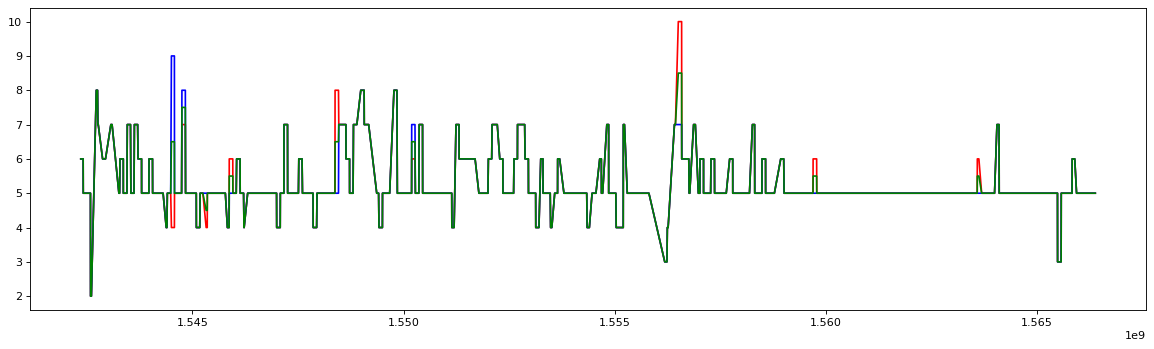

In [44]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [25]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [26]:
# drop zeros 
p = p.drop(['work_time','date'], axis=1)

In [35]:
train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [36]:
X_train = train_set.loc[:,'accX':'day_sleep']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'day_sleep']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [37]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,AT_std,PlethysmogramGreen,ple_std,mood,tense,tired,rumination,socialize,socialize_val,day_sleep
90448,-0.57,0.02,7.97,0.02,-5.63,0.02,-0.14,0.08,0.07,0.04,...,0.01,2080914.0,115578.36,5,5,2,1,14,46,0
69217,5.20,0.03,-1.16,0.05,8.28,0.05,-0.14,0.25,0.14,0.21,...,0.01,2674622.0,61445.83,5,5,2,1,0,0,20
22515,-1.22,5.29,-6.89,3.04,-0.27,3.04,3.78,71.60,5.11,58.46,...,0.02,4193245.0,79.87,5,5,1,1,17,48,0
13166,-4.91,4.71,-5.06,3.17,-0.65,3.17,-0.63,68.53,-0.21,36.73,...,0.03,4193351.0,89.97,5,5,2,1,51,51,0
7021,-7.84,3.17,-4.73,2.46,-1.25,2.46,7.98,67.43,7.84,34.35,...,0.04,2794677.0,87827.22,5,5,1,1,0,0,790


In [38]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [39]:
y_pred_1 = rnd_reg.predict(X_train)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.38636496508340257

In [41]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

1.158565730596516

In [42]:

forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [0.38855384 0.38866709 0.38131013 0.38839744 0.39362907 0.38859158
 0.38649977 0.38776942 0.37627135 0.39044445]
Mean: 0.38701341538129325
std dev: 0.004623931448916747
